<a href="https://colab.research.google.com/github/rohitnikam1/Fastai-projects/blob/master/mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter, we encounter with the fundamentals of deep learning using the example of digit classifier (computer vision).

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 7.1 MB/s 
     |████████████████████████████████| 1.2 MB 15.8 MB/s 
     |████████████████████████████████| 46 kB 2.4 MB/s 
     |████████████████████████████████| 188 kB 40.5 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 51 kB 377 kB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

Here we are going to try to create a model that can classify any image as a 3 or a 7. So let's download a sample of MNIST that contains images of just these digits:

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

We can see what's in this directory by using ls, a method added by fastai.

In [6]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [5]:
Path.BASE_PATH = path

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

There's a folder of 3s, and a folder of 7s in the training folder. In machine learning parlance, we say that "3" and "7" are the labels (or targets) in this dataset. Let's take a look in one of these folders (using `sorted` to ensure we all get the same order of files):

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

As we might expect, it's full of image files. Let’s take a look at one now. Here’s an image of a handwritten number 7, taken from the famous MNIST dataset of handwritten numbers:

In [10]:
im7_path = sevens[0]
seven = Image.open(im7_path)
seven

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor. For instance, here's what a section of the image looks like, converted to a NumPy array:

In [12]:
array(seven)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

Here's the same thing as a PyTorch tensor:

In [13]:
tensor(seven)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

Pandas DataFrame can be used to color-code the values using a gradient, which shows us clearly how the image is created from the pixel values:

In [15]:
im7_t = tensor(seven)
df = pd.DataFrame(im7_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,21,51,213,254,252,252,252,254,252,252,252,254,252,252,252,255,252,100,0,0,0,0,0,0
8,0,0,0,21,161,250,250,252,250,250,250,252,250,250,250,252,250,250,250,252,250,100,0,0,0,0,0,0
9,0,0,0,51,250,250,250,252,189,190,250,252,250,250,250,252,250,250,250,252,189,40,0,0,0,0,0,0


Following command creates a list of images (each for 3s and 7s) in a tensor form

In [7]:
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]

len(three_tensors),len(seven_tensors)

(6131, 6265)

We now combine all the images in this list into a single three-dimensional tensor and normalize the tensor elements by 255 - the highest pixel value, in order to constrain all the pixel values between 0 and 1

In [8]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

stacked_sevens.shape

torch.Size([6265, 28, 28])

## MNIST loss function

We already have our independent variables x—these are the images themselves. We'll concatenate them all into a single tensor, and also change them from a list of matrices (a rank-3 tensor) to a list of vectors (a rank-2 tensor). We can do this using `view`, which is a PyTorch method that changes the shape of a tensor without changing its contents. -1 is a special parameter to view that means "make this axis as big as necessary to fit all the data":

In [9]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [27]:
train_x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

We need a label for each image. We'll use 1 for 3s and 0 for 7s:

In [10]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [23]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [27]:
train_x.size(), train_y.size()

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A Dataset in PyTorch is required to return a tuple of (x,y) when indexed. Python provides a zip function which, when combined with list, provides a simple way to get this functionality:

In [11]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.size(), y

(torch.Size([784]), tensor([1]))

In [12]:
valid_3_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls().sorted()]).float()/255
valid_7_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls().sorted()]).float()/255

valid_3_tensor.size(),valid_7_tensor.size()

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [13]:
valid_x = torch.cat([valid_3_tensor, valid_7_tensor]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tensor) + [0]*len(valid_7_tensor)).unsqueeze(1)
valid_dataset = list(zip(valid_x, valid_y))

Now we need an (initially random) weight for every pixel

In [14]:
def init_params(size, variance=1):
  return (torch.randn(size)*variance).requires_grad_()

In [15]:
weights = init_params((28*28,1))

In [16]:
bias = init_params(1)

We can now calculate a prediction for one image:

In [17]:
(train_x[0]*weights.T).sum() + bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In Python, matrix multiplication is represented with the @ operator.

In [18]:
def linear1(xb):
  return xb@weights + bias

preds = linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

Let's check our accuracy. To decide if an output represents a 3 or a 7, we can just check whether it's greater than 0.5, so our accuracy for each item can be calculated with:

In [19]:
corrects = (preds > 0.5).float() == train_y

corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [20]:
corrects.float().mean().item()

0.5355759859085083

We now need a loss function the gradient of which will be taken using stochastic gradient descent method.

In [25]:
def mnist_loss(predictions, targets):
  return torch.where(targets == 1, 1-predictions, predictions).float().mean()

In [22]:
trgts = tensor([1,0,1])
preds = tensor([0.9, 0.4, 0.2])

In [23]:
torch.where(trgts == 1, 1-preds, preds)

tensor([0.1000, 0.4000, 0.8000])

In [26]:
print(mnist_loss(trgts, preds))

tensor(0.6667)


For the case when predictions are greater then one or lower than zero, they need to be mapped within 0-1 range. Sigmoid function serves that purpose:

In [27]:
def sigmoid(x): 
  return 1/(1+torch.exp(-x))

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


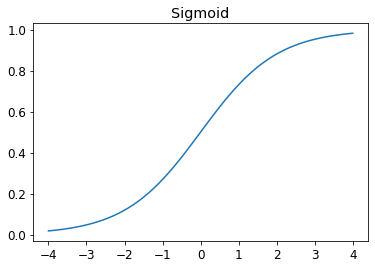

In [30]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

Let's then update `mnist_loss` function to apply sigmoid function to inputs

In [28]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets == 1, 1-predictions, predictions).float().mean()

### Optimization step

Having acquired the loss function suitable for driving SGD algorithm, we now see how weights are changed/updated based on the gradient, via Optimization step. 

During optimization step, we calculate an average loss over a mini-batch of the data. The class `DataLoader` from fastai easily facilitates this operation. Below is a toy example of how it is done.

`DataLoader` can take any python collection and convert it into an iterator over many batches as follows:

In [29]:
coll = range(17)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 7,  5, 11,  9, 10]),
 tensor([ 4, 16, 12,  2,  8]),
 tensor([ 0, 13, 15,  3, 14]),
 tensor([6, 1])]

A python collection that contains tuples of independent and dependent variables in known in Pytorch as a `Dataset`. As an example:

In [38]:
list(enumerate(string.ascii_lowercase))

[(0, 'a'),
 (1, 'b'),
 (2, 'c'),
 (3, 'd'),
 (4, 'e'),
 (5, 'f'),
 (6, 'g'),
 (7, 'h'),
 (8, 'i'),
 (9, 'j'),
 (10, 'k'),
 (11, 'l'),
 (12, 'm'),
 (13, 'n'),
 (14, 'o'),
 (15, 'p'),
 (16, 'q'),
 (17, 'r'),
 (18, 's'),
 (19, 't'),
 (20, 'u'),
 (21, 'v'),
 (22, 'w'),
 (23, 'x'),
 (24, 'y'),
 (25, 'z')]

In [40]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

On passing the `Dataset` to the `DataLoader`, we get many batches. Each batch is a tuple of tensors, representing a batch of independent and dependent variables:

In [45]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([20, 18, 21,  5,  6,  9]), ('u', 's', 'v', 'f', 'g', 'j')),
 (tensor([13, 19, 12, 16, 25,  3]), ('n', 't', 'm', 'q', 'z', 'd')),
 (tensor([15,  1,  0, 24, 10, 23]), ('p', 'b', 'a', 'y', 'k', 'x')),
 (tensor([11, 22,  2,  4, 14, 17]), ('l', 'w', 'c', 'e', 'o', 'r')),
 (tensor([7, 8]), ('h', 'i'))]

We are now ready to write our first training loop for a model using SGD!

## Putting it all together

In [30]:
weights = init_params((28*28),1)
bias = init_params(1)

Creating a `DataLoader` from a `Dataset`

In [31]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [32]:
valid_dl = DataLoader(valid_dataset, batch_size=256)

Let's create a mini-batch of size 4 for testing:

In [33]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [34]:
preds = linear1(batch)
preds

tensor([15.7077, 18.6850, 16.2143, 17.4726], grad_fn=<AddBackward0>)

In [35]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(5.9605e-08, grad_fn=<MeanBackward0>)

Now calculating the gradients

In [36]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784]), tensor(-8.5305e-09), tensor([-5.9605e-08]))

Putting all that in a function

In [37]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [38]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-1.7061e-08), tensor([-1.1921e-07]))

Always set the current gradients to zero once they have been utilized. Otherwise `loss.backward()` adds the current gradient to the previous ones.

In [39]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

We now add the step where we update the weights and bias. Basic training loop for one epoch then looks like:

In [40]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In order to keep track on how we are doing, we calculate the batch accuracy as follows:

In [41]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

Checking how `batch_accuracy` works:

In [42]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

Then putting all batches together:

In [43]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [44]:
validate_epoch(linear1)

0.5509

That's our starting point. Let's train for one epoch, and see if the accuracy improves:

In [45]:
lr = 1.0
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7017

Doing few more times

In [46]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.8451 0.8964 0.9191 0.9331 0.9426 0.9455 0.9507 0.9526 0.9541 0.955 0.9564 0.9569 0.9583 0.9588 0.9593 0.9608 0.9608 0.9623 0.9627 0.9632 

The above architecture is foundational towards deep learning. Pytorch therefore provides some useful classes to make it easier to implement.

We can replace `linear1` model with Pytorch's `nn.Linear` module, which performs similar to `linear1` and `init_params` put together.

In [47]:
linear_model = nn.Linear(28*28, 1)

In [48]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

We now create an Optimizer class

In [49]:
class BasicOptim:
  def __init__(self,params,lr): 
    self.params,self.lr = list(params),lr

  def step(self, *args, **kwargs):
    for p in self.params: 
      p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
    for p in self.params: 
      p.grad = None

In [50]:
opt = BasicOptim(linear_model.parameters(), lr)

Our training loop can now be simplifies as:

In [51]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()

There is no need to change the validation function

In [52]:
validate_epoch(linear_model)

0.5199

Let's now put our epoch training function in a loop

In [53]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [54]:
train_model(linear_model, 20)

0.4932 0.7612 0.8618 0.9175 0.9351 0.9502 0.9565 0.9638 0.9658 0.9678 0.9697 0.9717 0.9736 0.9751 0.9756 0.977 0.9775 0.9775 0.9785 0.9785 

fastai provides the SGD class which, by default, does the same thing as our `BasicOptim`:

In [55]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8335 0.8428 0.9116 0.9336 0.9478 0.9551 0.9629 0.9648 0.9673 0.9702 0.9712 0.9731 0.9746 0.9756 0.9765 0.9775 0.9775 0.9785 0.9785 

fastai also provides `Learner.fit` which can be used instead of `train_model`.

To create `Learner`, we first need to create `DataLoaders`, by passing in our training and validation `DataLoaders`.

In [56]:
dls = DataLoaders(dl, valid_dl)

The elements needed by `Learner` are: 
- `DataLoaders`
- model 
- optimization function (to which the parameters will be passed)
- loss function 
- optionally any metrics to print

In [57]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [58]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637041,0.503647,0.495584,00:00
1,0.608709,0.105231,0.931305,00:00
2,0.219663,0.233893,0.782630,00:00
3,0.094690,0.119848,0.897939,00:00
4,0.048565,0.083947,0.928361,00:00
5,0.030652,0.065967,0.944063,00:00
6,0.023339,0.055115,0.954367,00:00
7,0.020141,0.048012,0.960746,00:00
8,0.018561,0.043087,0.964671,00:00
9,0.017641,0.039496,0.966634,00:00


## Adding Nonlinearity

Basic definition of an entire neural network is:

In [59]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

where the max function in between the two linear classifiers adds a nonlinearity to the model. w's and b's are initialized as:

In [60]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The important point here is that w1 has 30 output activations (which implies that w2 has 30 input activations). This means that the first layer can construct 30 different features, each representing a different mix of pixels.

The function `res.max(tensor(0.0))` is called a rectified linear unit, also known as ReLU, available in Pytorch as F.relu:

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


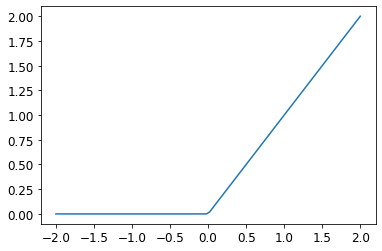

In [61]:
plot_function(F.relu)

The three lines of code that we have here are known as layers. The first and third are known as linear layers, and the second line of code is known variously as a nonlinearity, or activation function.

Just like in the previous section, we can replace this code with something a bit simpler, by taking advantage of PyTorch:

In [61]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

`nn.Sequential` creates a module that will call each of the listed layers or functions in turn.

Because `nn.Sequential` is a module, we can get its parameters, which will return a list of all the parameters of all the modules it contains. Let's try it out! As this is a deeper model, we'll use a lower learning rate and a few more epochs.

In [62]:
learn =  Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [63]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.336330,0.405525,0.509323,00:00
1,0.154334,0.235406,0.791953,00:00
2,0.084804,0.118024,0.910697,00:00
3,0.055245,0.079301,0.938175,00:00
4,0.041600,0.061755,0.954858,00:00
5,0.034672,0.051983,0.962709,00:00
6,0.030714,0.045839,0.965162,00:00
7,0.028152,0.041629,0.965653,00:00
8,0.026309,0.038551,0.968106,00:00
9,0.024882,0.036186,0.969578,00:00


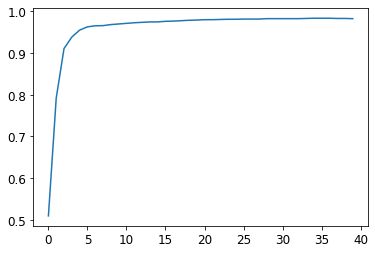

In [64]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [65]:
learn.recorder.values[-1][2]

0.98233562707901

### A single nonlinearity with two linear layers is thus enough to approximate any function.

# Going deeper

In [66]:
dls = ImageDataLoaders.from_folder(path)

In [67]:
learn = cnn_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,0.089136,0.014225,0.996565,00:23
